In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras.callbacks import EarlyStopping
from PIL import Image 
import io              
import warnings
from tensorflow import keras
import matplotlib.pyplot as plt
# Load model and class names
warnings.filterwarnings('ignore')

In [15]:
import os

def load_full_dataset(dataset_path, verbose=True):
    """
    Loads the dataset paths for Parasitized and Uninfected folders.
    
    Args:
        dataset_path (str): Path to your unzipped dataset folder (should contain 'Parasitized' and 'Uninfected')
        verbose (bool): If True, print dataset information
    
    Returns:
        dict: Paths for 'Parasitized' and 'Uninfected' folders, or None if paths not found
    """
    parasitized_path = os.path.join(dataset_path, "Parasitized")
    uninfected_path = os.path.join(dataset_path, "Uninfected")

    if not os.path.isdir(parasitized_path) or not os.path.isdir(uninfected_path):
        if verbose:
            print(f"❌ Folder structure incorrect. Expected:\n{parasitized_path}\n{uninfected_path}")
        return None

    if verbose:
        parasitized_count = len([f for f in os.listdir(parasitized_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        uninfected_count = len([f for f in os.listdir(uninfected_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

        print(f"✅ Dataset Loaded from: {dataset_path}")
        print(f"📊 Parasitized Images: {parasitized_count}")
        print(f"📊 Uninfected Images: {uninfected_count}")

    return {
        "Parasitized": parasitized_path,
        "Uninfected": uninfected_path
    }


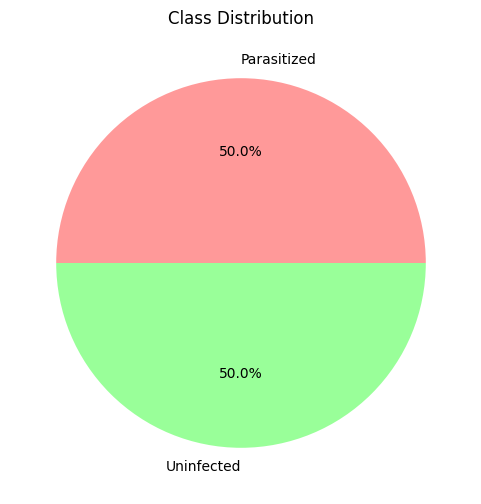

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


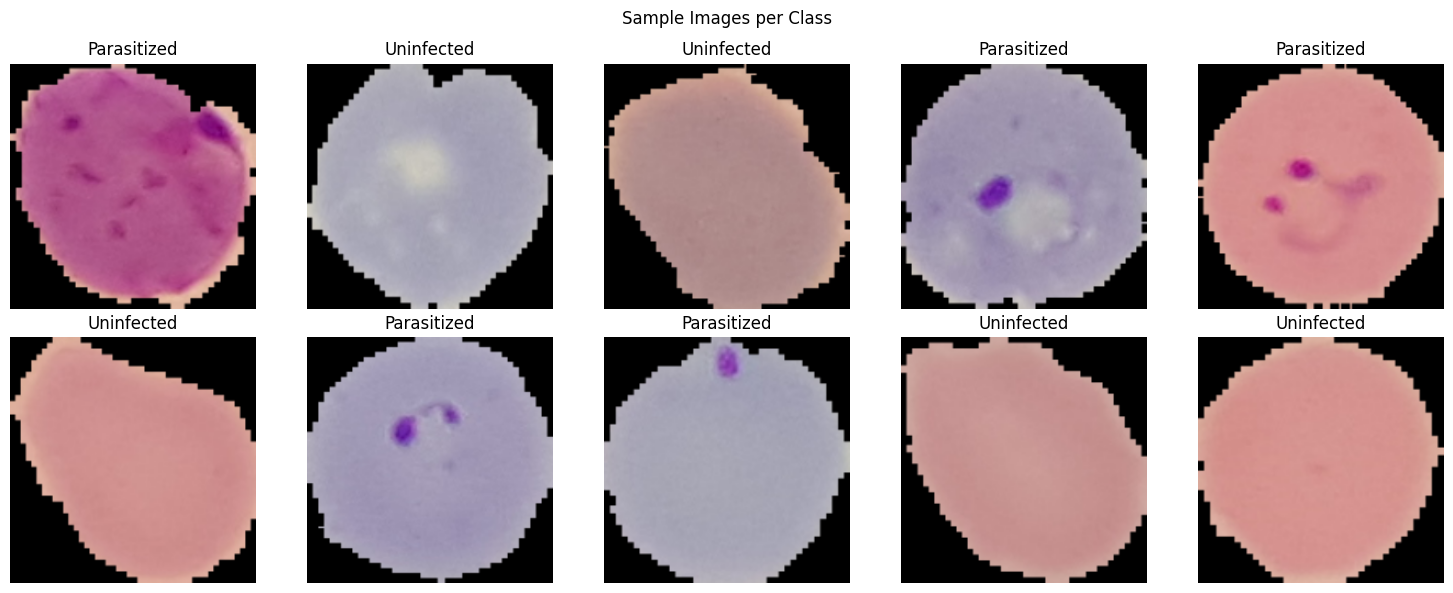

In [16]:

def plot_class_distribution_pie(dataset_path):
    class_folders = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    counts = [len(os.listdir(os.path.join(dataset_path, c))) for c in class_folders]
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=class_folders, autopct='%1.1f%%', colors=['#ff9999', '#99ff99'])
    plt.title("Class Distribution")
    plt.show()


def visualize_sample_images_with_predictions(dataset, model=None, class_names=None, samples_per_class=5):
    plt.figure(figsize=(15, 6))
    displayed = {name: 0 for name in class_names}
    total_displayed = 0
    max_total = samples_per_class * len(class_names)

    for images, labels in dataset.unbatch():
        label = int(labels.numpy())
        class_name = class_names[label]

        if displayed[class_name] < samples_per_class:
            plt.subplot(len(class_names), samples_per_class, total_displayed + 1)
            img = images.numpy().astype("uint8")
            plt.imshow(img)

            title = class_name
            if model:
                pred_probs = model.predict(tf.expand_dims(images, axis=0), verbose=0)
                pred_label = class_names[np.argmax(pred_probs)]
                title = f"True: {class_name}\nPred: {pred_label}"

            plt.title(title)
            plt.axis("off")
            displayed[class_name] += 1
            total_displayed += 1

        if total_displayed >= max_total:
            break

    plt.suptitle("Sample Images with Predictions" if model else "Sample Images per Class")
    plt.tight_layout()
    plt.show()



dataset_path = r"C:\Users\KevinNyiringango\SafeCell\archive (1)\cell_images"


plot_class_distribution_pie(dataset_path)


train_ds = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)


class_names = train_ds.class_names

visualize_sample_images_with_predictions(train_ds, class_names=class_names)


Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.
Classes: ['Parasitized', 'Uninfected']
Creating regularized model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 130s 133ms/step - accuracy: 0.6389 - loss: 0.6408 - val_accuracy: 0.9370 - val_loss: 0.2086
Epoch 2/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 83s 121ms/step - accuracy: 0.9178 - loss: 0.2703 - val_accuracy: 0.9374 - val_loss: 0.2150
Epoch 3/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.9369 - loss: 0.2469 - val_accuracy: 0.9550 - val_loss: 0.1860
Epoch 4/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 86s 124ms/step - accuracy: 0.9415 - loss: 0.2260 - val_accuracy: 0.9516 - val_loss: 0.1786
Epoch 5/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 86s 124ms/step - accuracy: 0.9466 - loss: 0.2111 - val_accuracy: 0.9545 - val_loss: 0.1720
Epoch 6/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 84s 122ms/step - accuracy: 0.9482 - loss: 0.2047 - val_accuracy: 0.9523 - val_loss: 0.1734
Epoch 7/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.9482 - loss: 0.2123 - val_accuracy: 0.9497 - val_loss: 0.1783
Epoch 8/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accurac

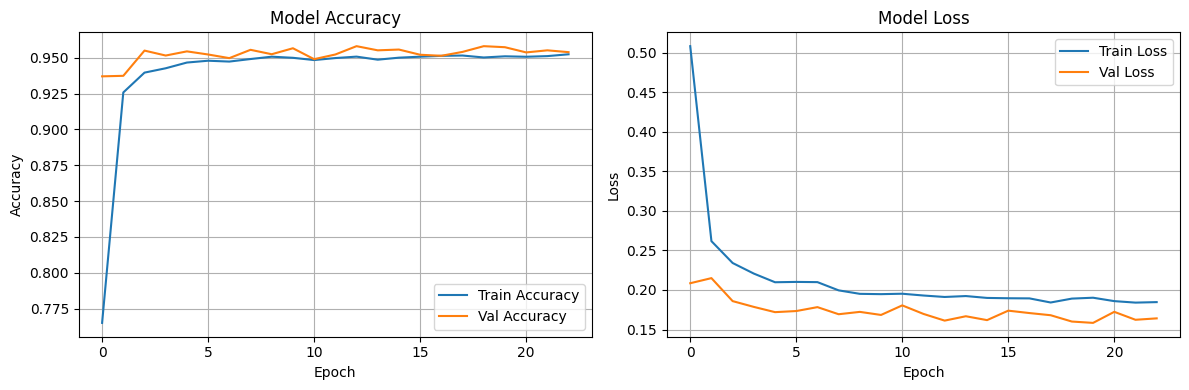


Training Set Distribution:

Class Distribution:
  Parasitized: 11062 samples (50.2%)
  Uninfected: 10985 samples (49.8%)

Validation Set Distribution:

Class Distribution:
  Parasitized: 2717 samples (49.3%)
  Uninfected: 2794 samples (50.7%)


In [6]:
os.makedirs("saved_models", exist_ok=True)
image_size = (128, 128)
batch_size = 32

train_dataset = keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode='int'
)

val_dataset = keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode='int'
)

class_names = train_dataset.class_names
print(f"Classes: {class_names}")


def preprocess_data(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)
val_dataset = val_dataset.map(preprocess_data, num_parallel_calls=AUTOTUNE)

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)


data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


def create_regularized_model(input_shape=(128, 128, 3), num_classes=2):
    weight_decay = 1e-4
    model = models.Sequential([
        data_augmentation,

        layers.Conv2D(16, (3, 3), activation='relu', 
                      kernel_regularizer=regularizers.l2(weight_decay),
                      input_shape=input_shape),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(32, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(weight_decay)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(weight_decay)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l2(weight_decay)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


print("Creating regularized model...")
regularized_model = create_regularized_model()
regularized_model.summary()

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

print("Training model...")
history = regularized_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stop],
    verbose=1
)


val_loss, val_acc = regularized_model.evaluate(val_dataset, verbose=0)
print(f"\n✅ Validation Accuracy: {val_acc:.4f} ({val_acc * 100:.2f}%)")
print(f"📉 Validation Loss: {val_loss:.4f}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


def check_class_distribution(dataset, class_names):
    class_counts = {name: 0 for name in class_names}
    total_samples = 0

    for _, labels in dataset:
        for label in labels:
            class_counts[class_names[label.numpy()]] += 1
            total_samples += 1

    print(f"\nClass Distribution:")
    for class_name, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f"  {class_name}: {count} samples ({percentage:.1f}%)")

    return class_counts

print("\nTraining Set Distribution:")
train_dist = check_class_distribution(train_dataset, class_names)

print("\nValidation Set Distribution:")
val_dist = check_class_distribution(val_dataset, class_names)


<Figure size 600x600 with 0 Axes>

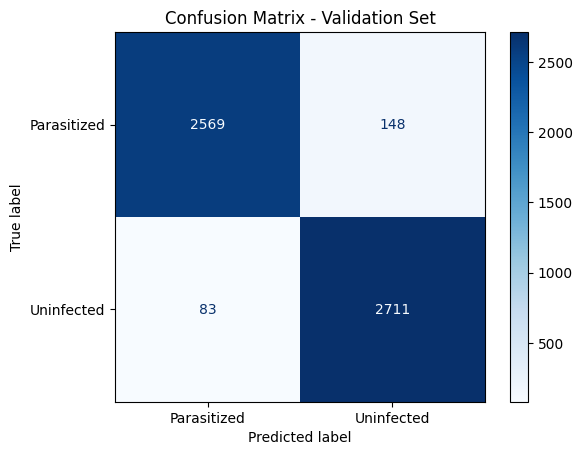


Classification Report:
              precision    recall  f1-score   support

 Parasitized       0.97      0.95      0.96      2717
  Uninfected       0.95      0.97      0.96      2794

    accuracy                           0.96      5511
   macro avg       0.96      0.96      0.96      5511
weighted avg       0.96      0.96      0.96      5511



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for images, labels in val_dataset.unbatch():
    preds = regularized_model.predict(tf.expand_dims(images, axis=0), verbose=0)
    pred_label = np.argmax(preds)
    
    y_true.append(labels.numpy())
    y_pred.append(pred_label)


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Validation Set")
plt.show()


print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


In [8]:
regularized_model.save("saved_models/malaria_model.h5")
print("✅ Model saved as 'malaria_model.h5'")


✅ Model saved as 'malaria_model.h5'


In [1]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [9]:
simple_model = keras.models.load_model("saved_models/malaria_model.h5")


In [ ]:

simple_model = keras.models.load_model("saved_models/malaria_model.h5")
class_names = ['Parasitized', 'Uninfected']
import ipywidgets as widgets
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

def on_upload_change(change):
    if upload_widget.value:
        uploaded_file = upload_widget.value[0]
        img = Image.open(io.BytesIO(uploaded_file['content'])).convert("RGB")
        img = img.resize((128, 128))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        preds = simple_model.predict(img_array)
        pred_class_idx = np.argmax(preds, axis=1)[0]
        pred_class_name = class_names[pred_class_idx]
        confidence = preds[0][pred_class_idx]

        # Debug
        print(f"Predictions: {preds}, Class index: {pred_class_idx}, Class: {pred_class_name}")

        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{pred_class_name} ({confidence:.2%})")
        plt.show()

upload_widget.observe(on_upload_change, names='value')
display(upload_widget)


FileUpload(value=(), accept='image/*', description='Upload')